**02.Perform grid search for hyper-parameter tuning**


1. Use the code given in listing 2 to load data.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import check_random_state

# data loading
train_samples = 500
X, y = fetch_openml("mnist_784",version = 1 , return_X_y = True , as_frame = False)
random_state = check_random_state(0)
permutation = random_state.permutation ( X.shape[0])
X = X [permutation]
y = y [permutation]
X = X.reshape ((X.shape[0], -1))
X_train, X_test, y_train, y_test = train_test_split (X, y, train_size = train_samples, test_size =100)


3. Use lasso logistic regression for image classification as "LogisticRegression(penalty=’l1’, solver=’liblinear’, multi_class=’auto’)". Next, create a pipeline that includes the scaling, the Lasso logistic regression estimator, and a parameter grid for hyperparameter
tuning (C value).

In [4]:
# Create a pipeline with scaling and Lasso logistic regression
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('lasso', LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto'))
])

# Define a parameter grid for hyperparameter tuning (C value)
param_grid = {
    'lasso__C': np.logspace(-2, 2, 9)
}


4. Use GridSearchCV to perform a grid search over the range (e.g., np.logspace(-2, 2, 9)) of to find optimal value of hyperparameter C.

In [5]:
from sklearn.model_selection import GridSearchCV

# Create GridSearchCV
grid_search = GridSearchCV(estimator=lasso_pipeline, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameter value
best_C = grid_search.best_params_['lasso__C']


c:\Users\lasit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\lasit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\lasit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


5. Plot the classification accuracy with respect to hyperparameter C. Comment on your
results.

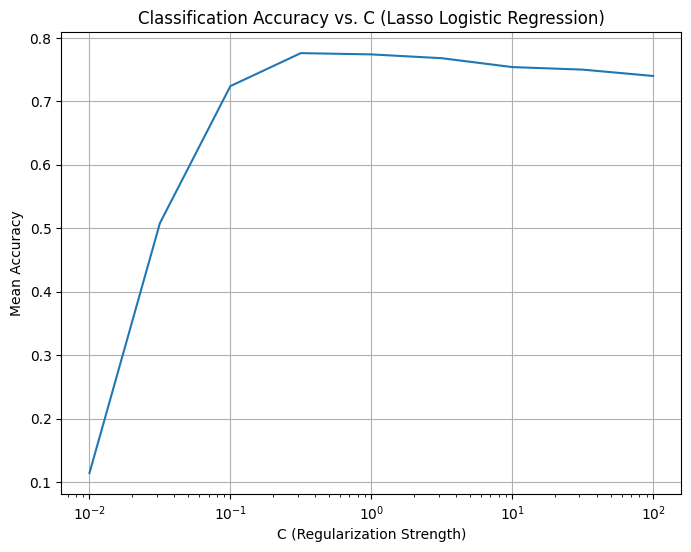

In [6]:
import matplotlib.pyplot as plt

# Get the accuracy for each C value during grid search
grid_results = grid_search.cv_results_
accuracies = grid_results['mean_test_score']

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.semilogx(param_grid['lasso__C'], accuracies)
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Mean Accuracy')
plt.title('Classification Accuracy vs. C (Lasso Logistic Regression)')
plt.grid(True)
plt.show()


6. Calculate confusion matrix, precision, recall and F1-score. Comment on your results.

In [9]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Make predictions on the test data
y_pred = grid_search.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision score : {precision}")
print(f"Recall score: {recall}")
print(f"f1 score : {f1}")

Precision score : 0.8373852813852812
Recall score: 0.83
f1 score : 0.8291994190020507
